<a href="https://colab.research.google.com/github/brahma2024/BigramLanguageModel/blob/main/BigramLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Get the names file loaded
!wget https://raw.githubusercontent.com/brahma2024/BigramLanguageModel/main/names.txt


--2024-04-12 15:11:04--  https://raw.githubusercontent.com/brahma2024/BigramLanguageModel/main/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228146 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K  --.-KB/s    in 0.03s   

2024-04-12 15:11:04 (7.57 MB/s) - ‘names.txt’ saved [228146/228146]



In [101]:
words = open('names.txt', 'r').read().splitlines()
print(f'{words=}')
len(words)

words=['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn', 'abigail', 'emily', 'elizabeth', 'mila', 'ella', 'avery', 'sofia', 'camila', 'aria', 'scarlett', 'victoria', 'madison', 'luna', 'grace', 'chloe', 'penelope', 'layla', 'riley', 'zoey', 'nora', 'lily', 'eleanor', 'hannah', 'lillian', 'addison', 'aubrey', 'ellie', 'stella', 'natalie', 'zoe', 'leah', 'hazel', 'violet', 'aurora', 'savannah', 'audrey', 'brooklyn', 'bella', 'claire', 'skylar', 'lucy', 'paisley', 'everly', 'anna', 'caroline', 'nova', 'genesis', 'emilia', 'kennedy', 'samantha', 'maya', 'willow', 'kinsley', 'naomi', 'aaliyah', 'elena', 'sarah', 'ariana', 'allison', 'gabriella', 'alice', 'madelyn', 'cora', 'ruby', 'eva', 'serenity', 'autumn', 'adeline', 'hailey', 'gianna', 'valentina', 'isla', 'eliana', 'quinn', 'nevaeh', 'ivy', 'sadie', 'piper', 'lydia', 'alexa', 'josephine', 'emery', 'julia', 'delilah', 'arianna', 'vivian', 'kaylee', 'sophie', 'brielle', 'madeline', 'peyton',

32033

In [102]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [103]:
# Also its important to have a start and an end to the word
# For start and End instead of choosing <S> and <E> which will specifically determine the start and the End
# we will use the special character - say "." (reason for this is well explained in the video tutorial here https://www.youtube.com/watch?v=PaCmpygFfXo&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=3)
wordspecial = ["." + word + "." for word in words]
wordspecial

['.emma.',
 '.olivia.',
 '.ava.',
 '.isabella.',
 '.sophia.',
 '.charlotte.',
 '.mia.',
 '.amelia.',
 '.harper.',
 '.evelyn.',
 '.abigail.',
 '.emily.',
 '.elizabeth.',
 '.mila.',
 '.ella.',
 '.avery.',
 '.sofia.',
 '.camila.',
 '.aria.',
 '.scarlett.',
 '.victoria.',
 '.madison.',
 '.luna.',
 '.grace.',
 '.chloe.',
 '.penelope.',
 '.layla.',
 '.riley.',
 '.zoey.',
 '.nora.',
 '.lily.',
 '.eleanor.',
 '.hannah.',
 '.lillian.',
 '.addison.',
 '.aubrey.',
 '.ellie.',
 '.stella.',
 '.natalie.',
 '.zoe.',
 '.leah.',
 '.hazel.',
 '.violet.',
 '.aurora.',
 '.savannah.',
 '.audrey.',
 '.brooklyn.',
 '.bella.',
 '.claire.',
 '.skylar.',
 '.lucy.',
 '.paisley.',
 '.everly.',
 '.anna.',
 '.caroline.',
 '.nova.',
 '.genesis.',
 '.emilia.',
 '.kennedy.',
 '.samantha.',
 '.maya.',
 '.willow.',
 '.kinsley.',
 '.naomi.',
 '.aaliyah.',
 '.elena.',
 '.sarah.',
 '.ariana.',
 '.allison.',
 '.gabriella.',
 '.alice.',
 '.madelyn.',
 '.cora.',
 '.ruby.',
 '.eva.',
 '.serenity.',
 '.autumn.',
 '.adeline.',
 

In [104]:
# create a bigram
# print(words[:1])
wordbigram = [[(word[i], word[i+1]) for i in range(len(word) - 1)] for word in wordspecial[:2]]
bigrams = []
[bigrams.extend(bigram) for bigram in wordbigram]
bigrams

[('.', 'e'),
 ('e', 'm'),
 ('m', 'm'),
 ('m', 'a'),
 ('a', '.'),
 ('.', 'o'),
 ('o', 'l'),
 ('l', 'i'),
 ('i', 'v'),
 ('v', 'i'),
 ('i', 'a'),
 ('a', '.')]

In [105]:
# create a dictionary to maintain bigram count
b = {}
# iterate over each word and maintain the count
for bigram in bigrams:
  # print(bigram)
  b[bigram] = b.get(bigram, 0) + 1
  # in case the bigram does not exist b.get(bigram, 0) will return a 0
b

{('.', 'e'): 1,
 ('e', 'm'): 1,
 ('m', 'm'): 1,
 ('m', 'a'): 1,
 ('a', '.'): 2,
 ('.', 'o'): 1,
 ('o', 'l'): 1,
 ('l', 'i'): 1,
 ('i', 'v'): 1,
 ('v', 'i'): 1,
 ('i', 'a'): 1}

In [78]:
sorted(b.items(), key = lambda kv:-kv[1]) # sort the items using the second element, which in this case is a 'count'

[(('n', '.'), 6763),
 (('a', '.'), 6640),
 (('a', 'n'), 5438),
 (('.', 'a'), 4410),
 (('e', '.'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('.', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('.', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '.'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('.', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '.'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('.', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '.'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('.', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('.', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('.', 'l'), 1572),
 (('.', 'c'), 1542),
 (('.', 'e'), 1531),
 (('j', 'a'), 1473),
 (('r', '.'), 1377),
 (('n', 'e'),

In [ ]:
chars = sorted(list(set("".join(words))))
stoi = {s:i for i, s in enumerate(chars)}
stoi['.'] = 26
stoi

In [159]:
itos = {i:s for s, i in stoi.items()}
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '.'}

In [131]:
import torch

In [152]:
# store the data in pytorch array
N = torch.zeros((27,27), dtype = torch.int32) # since we are going to save counts in these arrays, changing data type from default float to int

In [153]:
# Creating the array
# Logic: fo for each character we have converted into an integeer - information stored in stoi
# N which is a 27, 27 array, saves the bigram count using the index of the characters in the bigram ( refer youtube andrej lecture)
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

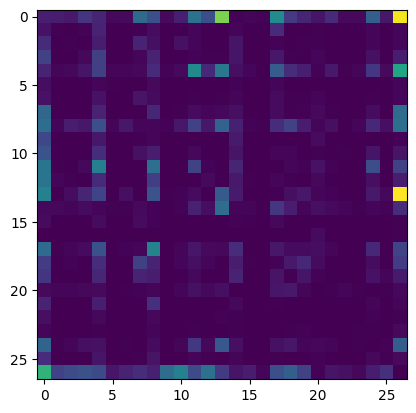

In [154]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

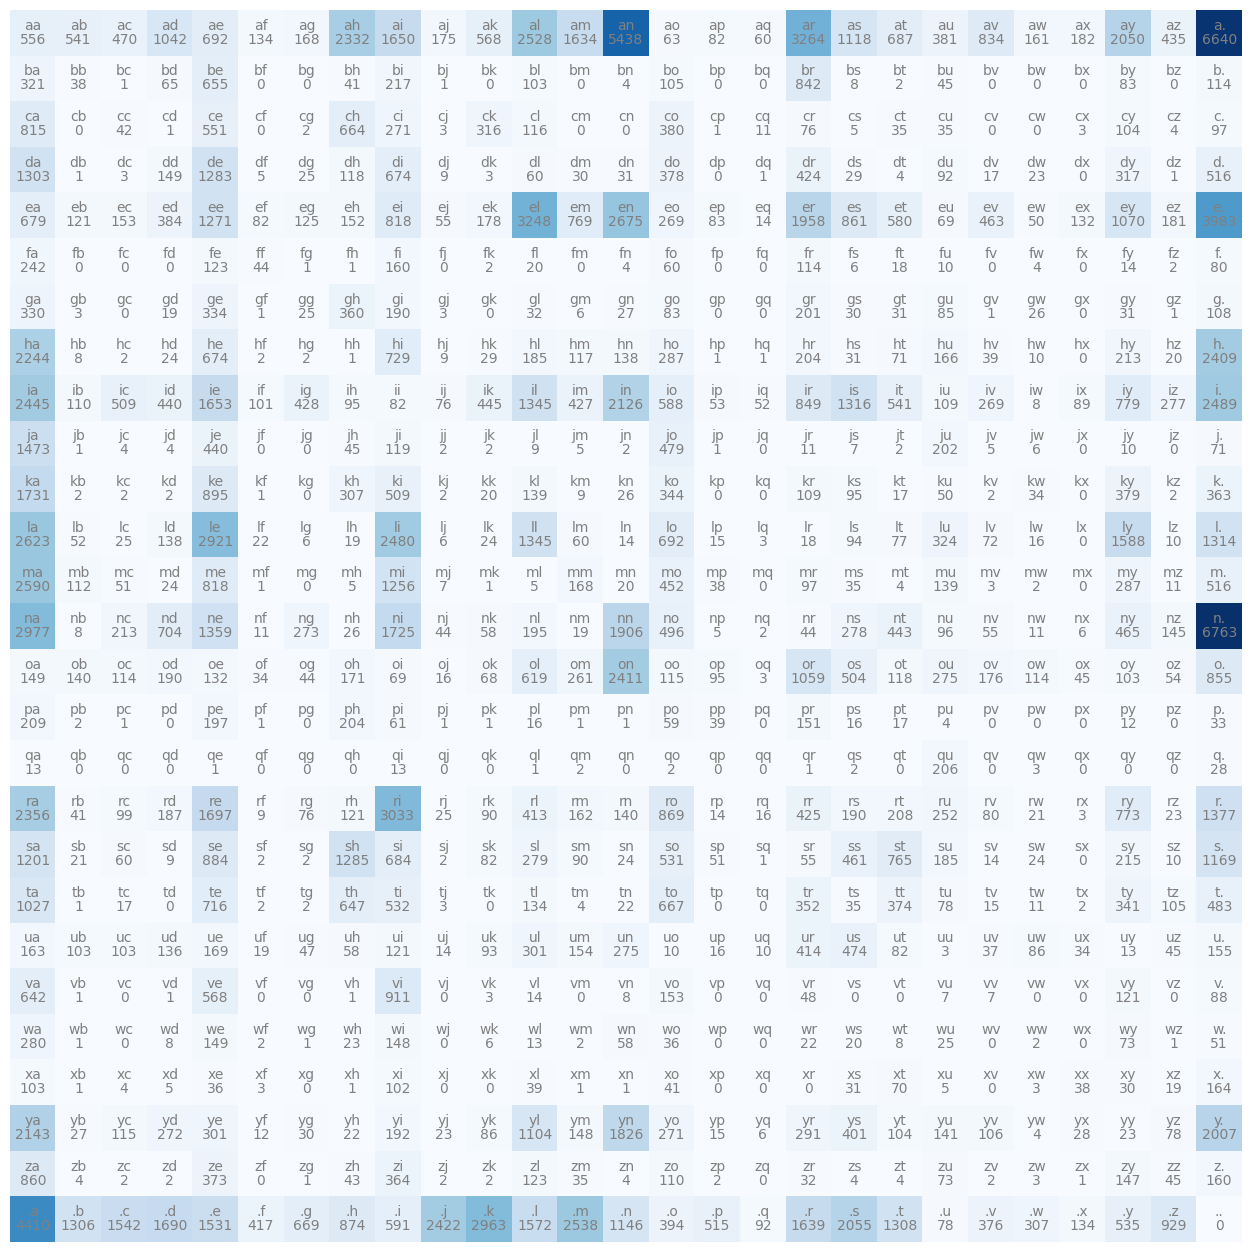

In [160]:
# better code to visualize the bigram count

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
  for j in range(27):
    chstr = itos[i] + itos[j]
    plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
    plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [ ]:
# input sequence= xs, output sequence = ys